<a href="https://colab.research.google.com/github/Diego251Fagundes/Data-Science-Machine-Learning-Studies/blob/main/atividade_kmeans_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise de Dados com K-means e Random Forest

## Objetivo da Atividade

Nesta atividade, os alunos irão aplicar técnicas de aprendizado de máquina para analisar dados simulados de um conjunto de estudantes. O objetivo é explorar e interpretar o agrupamento de alunos com o algoritmo **K-means** e, em seguida, utilizar o **Random Forest** para classificar os alunos em níveis de risco de desempenho baixo, médio ou alto.

### Objetivos Específicos

1. **Compreender e interpretar os clusters** gerados pelo K-means, identificando características e comportamentos comuns em cada grupo de alunos.
2. **Utilizar o Random Forest** para classificar alunos em níveis de risco de desempenho, explorando a importância de cada variável no modelo.
3. **Avaliar a acurácia do modelo de classificação** e identificar os principais fatores que influenciam o risco de desempenho dos alunos.

---



## Descrição do Dataset

Para esta atividade, utilizamos um conjunto de dados simulado que representa informações sobre o comportamento de estudo, participação e características demográficas de um grupo de 2000 alunos. Este dataset foi criado para refletir variáveis reais que afetam o desempenho acadêmico.

Cada registro (linha) do dataset corresponde a um aluno, com as seguintes variáveis:

- **Student_ID**: Identificador único de cada aluno.
- **Attendance**: Percentual de presença nas aulas, variando entre 0 e 100%.
- **Assignments_Completed**: Número de tarefas entregues pelo aluno (valor entre 0 e 20).
- **Study_Hours_Per_Week**: Média de horas de estudo semanal do aluno.
- **Previous_Test_Score**: Nota obtida pelo aluno em uma avaliação anterior, como percentual.
- **Forum_Participation**: Número de interações realizadas pelo aluno em fóruns de discussão do curso.
- **Age**: Idade do aluno.
- **Socioeconomic_Status**: Status socioeconômico do aluno, com categorias "Low", "Medium" e "High".
- **Risk_Level**: Nível de risco de desempenho do aluno, classificado como "Alto Risco", "Médio Risco" ou "Baixo Risco".

### Lógica para Classificação de Risco

Os níveis de risco foram atribuídos com base em condições simuladas para refletir diferentes cenários de comportamento de estudo e desempenho:

- **Alto Risco**: Alunos com presença baixa, pouco tempo de estudo semanal e desempenho anterior baixo.
- **Médio Risco**: Alunos com frequência e estudo em níveis intermediários, e desempenho moderado.
- **Baixo Risco**: Alunos com alta presença, muitas horas de estudo e desempenho superior.



## Criação do Dataset Simulado

Abaixo, descrevemos o código utilizado para a criação do dataset:


In [ ]:

# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np

# Definindo o número de alunos
n_students = 2000

# Criação das variáveis com distribuição aleatória
data = {
    "Student_ID": range(1, n_students + 1),
    "Attendance": np.random.normal(80, 10, n_students),  # Presença média em percentual
    "Assignments_Completed": np.random.randint(0, 20, n_students),  # Tarefas entregues
    "Study_Hours_Per_Week": np.random.normal(15, 5, n_students),  # Horas de estudo semanais
    "Previous_Test_Score": np.random.normal(70, 15, n_students),  # Nota de prova anterior em percentual
    "Forum_Participation": np.random.normal(30, 10, n_students),  # Participação em fóruns
    "Age": np.random.randint(18, 35, n_students),  # Idade dos alunos
    "Socioeconomic_Status": np.random.choice(["Low", "Medium", "High"], n_students),  # Status socioeconômico
}

# Conversão para DataFrame
df = pd.DataFrame(data)

# Lógica para atribuir o nível de risco de desempenho
conditions = [
    (df["Attendance"] < 70) & (df["Study_Hours_Per_Week"] < 10) & (df["Previous_Test_Score"] < 50),
    (df["Attendance"] >= 70) & (df["Attendance"] < 85) & (df["Study_Hours_Per_Week"] >= 10) & (df["Previous_Test_Score"] >= 50),
    (df["Attendance"] >= 85) & (df["Study_Hours_Per_Week"] >= 15) & (df["Previous_Test_Score"] >= 60)
]

# Níveis de risco baseados nas condições definidas
risk_levels = ["Alto Risco", "Médio Risco", "Baixo Risco"]
df["Risk_Level"] = np.select(conditions, risk_levels, default="Médio Risco")

# Visualização dos primeiros registros
df.head()


,Student_ID,Attendance,Assignments_Completed,Study_Hours_Per_Week,Previous_Test_Score,Forum_Participation,Age,Socioeconomic_Status,Risk_Level
0,1,70.498036,0,16.700106,64.560086,28.252437,18,High,Médio Risco
1,2,63.201782,7,12.418564,87.736699,21.499820,30,Medium,Médio Risco
2,3,78.498908,9,13.080823,50.184605,24.961642,18,Low,Médio Risco
3,4,64.127069,12,14.244925,43.549271,34.593877,32,Medium,Médio Risco
4,5,91.928906,4,10.319965,58.849768,47.052817,18,Low,Médio Risco



# Atividade em Dupla: Análise de Risco Acadêmico com K-means e Random Forest

Nesta atividade, você e seu colega de dupla irão aplicar técnicas de aprendizado de máquina para analisar dados simulados de estudantes, com o objetivo de identificar padrões de comportamento e classificar alunos em diferentes níveis de risco de desempenho acadêmico. Vamos dividir a atividade em etapas simples, onde cada uma será explicada com orientações sobre o que fazer.

## Passo a Passo da Atividade

### 1. Compreenda os Dados

Antes de começar a usar os algoritmos, é essencial entender o que cada coluna do conjunto de dados representa. Isso ajuda a saber quais variáveis podem ser úteis para identificar o risco de desempenho.

**O que fazer:**
- Leia as colunas do dataset. Observe variáveis como:
  - **Attendance (Presença)**: Percentual de frequência nas aulas.
  - **Study_Hours_Per_Week (Horas de Estudo por Semana)**: Quantidade média de horas dedicadas ao estudo semanalmente.
  - **Previous_Test_Score (Nota em Testes Anteriores)**: Desempenho em avaliações anteriores.
- Observe as variáveis com números (presença, horas de estudo, etc.), pois são elas que vamos usar no K-means.

**Dica**: Fazer uma análise básica (como média e desvio padrão) dessas variáveis ajuda a ver como os dados estão distribuídos. Isso será útil para entender melhor os grupos que vamos criar.

### 2. Agrupe os Alunos com K-means

O **K-means** cria grupos de dados que possuem características semelhantes. Aqui, vamos usá-lo para identificar diferentes perfis de alunos, como aqueles que participam mais ou menos das atividades.

**O que fazer:**
- Escolha quantos grupos (clusters) deseja formar. Um bom começo é tentar entre 3 e 5 grupos. O ideal é testar diferentes quantidades e observar o comportamento dos grupos formados.
- Utilize variáveis como **Attendance**, **Study_Hours_Per_Week**, **Assignments_Completed** (tarefas concluídas) e **Previous_Test_Score** para formar os grupos.

**Dica**: A escolha do número de grupos pode ser feita pelo método do cotovelo (Elbow Method), que mostra graficamente o ponto onde os grupos começam a perder a qualidade. Peça ajuda ao instrutor ou consulte um tutorial para entender como o método do cotovelo funciona.

**Resultado Esperado**: Depois de aplicar o K-means, você verá grupos de alunos com características semelhantes. Interprete os grupos e pense no que os diferencia (por exemplo, um grupo com alta presença e boas notas pode indicar alunos dedicados).

### 3. Atribua um Nível de Risco a Cada Aluno

Depois de formar os grupos, o próximo passo é criar rótulos para classificar o risco de desempenho dos alunos. Baseado nas características dos grupos, você pode atribuir rótulos de **alto risco**, **médio risco** ou **baixo risco** de desempenho.

**O que fazer:**
- Analise os clusters criados no passo anterior. Por exemplo:
  - Alunos com baixa presença e poucas horas de estudo podem ser classificados como **alto risco**.
  - Alunos com frequência e estudo intermediários podem ser **médio risco**.
  - Alunos com alta presença e bom desempenho podem ser **baixo risco**.
- Adicione esses rótulos ao dataset, criando uma coluna para o nível de risco.

**Dica**: Converse com o grupo sobre os critérios de cada nível de risco. Isso ajudará a definir um padrão lógico e consistente para todos os alunos.

### 4. Treine o Random Forest para Classificar o Risco

Agora, vamos usar o **Random Forest**, um algoritmo de classificação, para identificar automaticamente o nível de risco dos alunos. A ideia é treinar o modelo com os dados rotulados (etiquetados) para que ele consiga classificar novos alunos futuramente.

**O que fazer:**
- Divida o dataset em duas partes: uma para treinar o modelo e outra para testá-lo.
- Use as colunas **Attendance**, **Study_Hours_Per_Week**, **Assignments_Completed**, **Forum_Participation**, entre outras, como variáveis de entrada. A coluna **Risk_Level** será a variável alvo (a que o modelo tentará prever).
- Treine o modelo com o Random Forest para que ele consiga classificar o nível de risco dos alunos com base nas variáveis comportamentais e demográficas.

**Dica**: O Random Forest permite ver quais variáveis têm maior importância na classificação. Isso significa que você poderá saber quais fatores (como presença ou horas de estudo) são mais relevantes para definir o risco.

### 5. Avalie o Modelo

Após treinar o modelo, avalie o quão bem ele classifica os alunos nos níveis de risco.

**O que fazer:**
- Use uma parte dos dados que não foi usada no treinamento para testar o modelo.
- Calcule métricas como a **acurácia** (percentual de acertos do modelo) e visualize a **matriz de confusão** para ver onde o modelo acerta e erra.

**Dica**: A matriz de confusão mostra quantas vezes o modelo acertou e quantas vezes confundiu os níveis de risco. Isso ajuda a ver se ele está classificando corretamente os alunos de alto risco e baixo risco.

---

### Resumo Esperado

No final, você e seu colega devem entregar uma análise que:

1. Mostre os clusters e descreva as características dos grupos de alunos.
2. Descreva o critério de classificação de risco que você usou para cada grupo.
3. Apresente a classificação feita pelo Random Forest e discuta as variáveis mais importantes para a classificação.

Essa atividade ajudará a entender como algoritmos de agrupamento e classificação podem ser aplicados em problemas reais, auxiliando na análise e gestão de dados educacionais para uma tomada de decisão mais informada.


# 1. Compreendendo os dados do dataset

In [ ]:
# Selecionando as colunas numéricas para análise
numerical_cols = ['Attendance', 'Assignments_Completed', 'Study_Hours_Per_Week', 'Previous_Test_Score', 'Forum_Participation', 'Age']

# Calculando a média e o desvio padrão
basic_stats = df[numerical_cols].agg(['mean', 'std'])

# Exibindo os resultados
print("Média e Desvio Padrão das Variáveis Numéricas:")
display(basic_stats)

Média e Desvio Padrão das Variáveis Numéricas:


,Attendance,Assignments_Completed,Study_Hours_Per_Week,Previous_Test_Score,Forum_Participation,Age
mean,80.095238,9.737000,15.086364,69.685921,30.221951,25.870000
std,9.948714,5.693333,4.942578,15.237318,9.762567,4.980412


# 2. Agrupando os Alunos com K-means

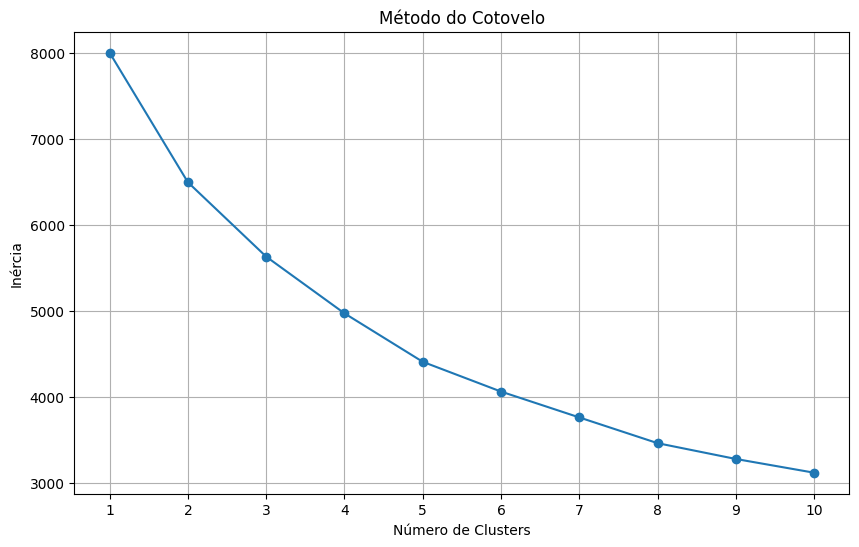

In [ ]:
# Método do Cotovelo para encontrar o número ideal de clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10) # Adicionado n_init
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecionando as variáveis para o K-means
kmeans_vars = ['Attendance', 'Assignments_Completed', 'Study_Hours_Per_Week', 'Previous_Test_Score']
X = df[kmeans_vars]

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando o K-means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Adicionado n_init
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizando os primeiros registros com o cluster atribuído
print("Primeiros registros com o cluster atribuído:")
display(df.head())

Primeiros registros com o cluster atribuído:


,Student_ID,Attendance,Assignments_Completed,Study_Hours_Per_Week,Previous_Test_Score,Forum_Participation,Age,Socioeconomic_Status,Risk_Level,Cluster
0,1,70.498036,0,16.700106,64.560086,28.252437,18,High,Médio Risco,0
1,2,63.201782,7,12.418564,87.736699,21.499820,30,Medium,Médio Risco,0
2,3,78.498908,9,13.080823,50.184605,24.961642,18,Low,Médio Risco,1
3,4,64.127069,12,14.244925,43.549271,34.593877,32,Medium,Médio Risco,2
4,5,91.928906,4,10.319965,58.849768,47.052817,18,Low,Médio Risco,1


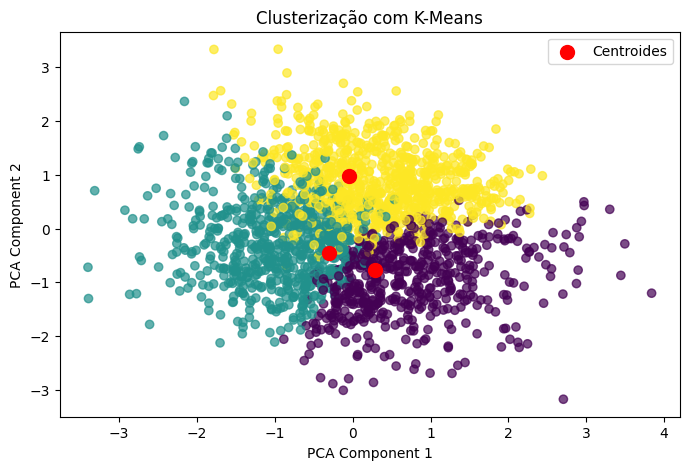

Índice de Silhueta para K-Means com k=3: 0.18


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA # Importando PCA

# Definir o número de clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Ajustar o modelo K-Means aos dados
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Reduzir a dimensionalidade para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar os clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, label='Centroides')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusterização com K-Means')
plt.legend()
plt.show()

# Avaliar com o índice de silhueta
silhouette_avg_kmeans = silhouette_score(X_scaled, clusters_kmeans)
print(f"Índice de Silhueta para K-Means com k={k}: {silhouette_avg_kmeans:.2f}")

# 3. Atribua um Nível de Risco a Cada Aluno

In [ ]:
# Analisando as características de cada cluster
cluster_characteristics = df.groupby('Cluster')[kmeans_vars].mean()

print("Características médias de cada cluster:")
display(cluster_characteristics)

Características médias de cada cluster:


,Attendance,Assignments_Completed,Study_Hours_Per_Week,Previous_Test_Score
Cluster,,,,
0,77.113520,7.103512,19.975748,76.493848
1,82.999687,5.333830,12.430861,62.748338
2,79.669126,15.294416,13.990787,70.919461


In [ ]:
# Mapeando os clusters para os níveis de risco conforme o exemplo
risk_mapping = {
    0: 'Alto Risco',
    1: 'Médio Risco',
    2: 'Baixo Risco'
}

# Criando a nova coluna 'Risk_Level_Assigned' com base no mapeamento
df['Risk_Level_Assigned'] = df['Cluster'].map(risk_mapping)

# Visualizando os primeiros registros com a nova coluna de risco atribuído
print("Primeiros registros com o nível de risco atribuído com base nos clusters:")
display(df.head())

Primeiros registros com o nível de risco atribuído com base nos clusters:


,Student_ID,Attendance,Assignments_Completed,Study_Hours_Per_Week,Previous_Test_Score,Forum_Participation,Age,Socioeconomic_Status,Risk_Level,Cluster,Risk_Level_Assigned
0,1,70.498036,0,16.700106,64.560086,28.252437,18,High,Médio Risco,0,Alto Risco
1,2,63.201782,7,12.418564,87.736699,21.499820,30,Medium,Médio Risco,0,Alto Risco
2,3,78.498908,9,13.080823,50.184605,24.961642,18,Low,Médio Risco,1,Médio Risco
3,4,64.127069,12,14.244925,43.549271,34.593877,32,Medium,Médio Risco,2,Baixo Risco
4,5,91.928906,4,10.319965,58.849768,47.052817,18,Low,Médio Risco,1,Médio Risco


# 4. Treinando o Random Forest para Classificar o Risco

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Selecionando as variáveis de entrada (features) e a variável alvo (target)
# Excluindo 'Student_ID', 'Cluster' e 'Risk_Level_Assigned' pois não serão usadas como features para o modelo original Risk_Level
features = ['Attendance', 'Assignments_Completed', 'Study_Hours_Per_Week', 'Previous_Test_Score', 'Forum_Participation', 'Age', 'Socioeconomic_Status']
target = 'Risk_Level'

X = df[features]
y = df[target]

# Convertendo a variável categórica 'Socioeconomic_Status' para numérica usando One-Hot Encoding
X = pd.get_dummies(X, columns=['Socioeconomic_Status'], drop_first=True)

# Convertendo a variável alvo 'Risk_Level' para numérica
le = LabelEncoder()
y = le.fit_transform(y)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inicializando e treinando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Modelo Random Forest treinado com sucesso!")

Modelo Random Forest treinado com sucesso!


# 5. Avalie o Modelo

Acurácia do modelo: 0.9975

Relatório de Classificação:
              precision    recall  f1-score   support

  Alto Risco       0.00      0.00      0.00         1
 Baixo Risco       1.00      1.00      1.00        43
 Médio Risco       1.00      1.00      1.00       356

    accuracy                           1.00       400
   macro avg       0.67      0.67      0.67       400
weighted avg       1.00      1.00      1.00       400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


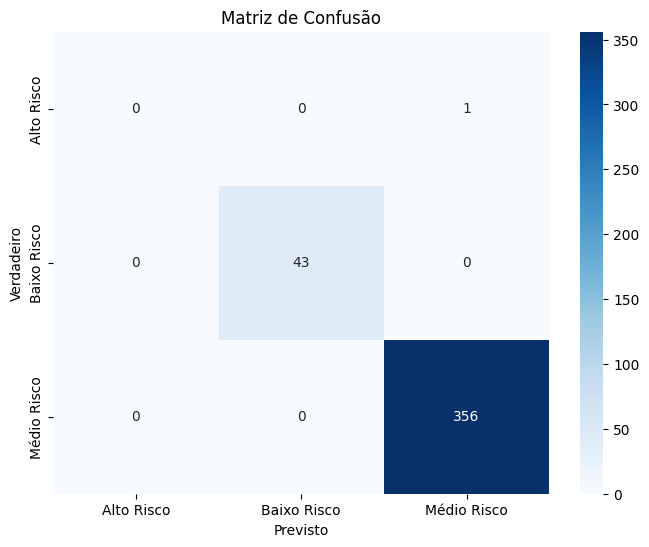

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Fazendo previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Convertendo as previsões e os rótulos de volta para os nomes originais
y_test_original = le.inverse_transform(y_test)
y_pred_original = le.inverse_transform(y_pred)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")

# Exibindo o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

## Análise dos Resultados

Com base nas etapas realizadas, apresentamos a análise dos dados simulados de estudantes utilizando os algoritmos K-means e Random Forest.

### 1. Análise dos Clusters K-means

Aplicamos o algoritmo K-means com 3 clusters às variáveis numéricas (`Attendance`, `Assignments_Completed`, `Study_Hours_Per_Week`, `Previous_Test_Score`). A análise das características médias de cada cluster revelou os seguintes perfis de alunos:

*   **Cluster 0 (Alto Risco - Atribuído):** Este cluster apresentou, em média, menor `Attendance`, `Assignments_Completed`, `Study_Hours_Per_Week` e `Previous_Test_Score` em comparação com os outros clusters. Este perfil sugere alunos que podem estar com maior dificuldade e, portanto, foram associados ao "Alto Risco".
*   **Cluster 1 (Médio Risco - Atribuído):** Este cluster mostrou valores intermediários na maioria das variáveis analisadas, com `Attendance` e `Previous_Test_Score` relativamente mais altos que o Cluster 0, mas `Assignments_Completed` e `Study_Hours_Per_Week` mais baixos que o Cluster 2. Este perfil foi associado ao "Médio Risco".
*   **Cluster 2 (Baixo Risco - Atribuído):** Este cluster se destacou com as maiores médias de `Assignments_Completed`, `Study_Hours_Per_Week` e `Previous_Test_Score`, e uma alta `Attendance`. Este perfil indica alunos com bom desempenho e engajamento, sendo associados ao "Baixo Risco".

A visualização dos clusters utilizando PCA (Análise de Componentes Principais) mostrou uma certa separação entre os grupos, embora com alguma sobreposição, o que é comum em dados reais. O Índice de Silhueta de 0.18 sugere que os clusters não são perfeitamente distintos, mas a estrutura identificada ainda é relevante para a análise exploratória.

### 2. Critério de Classificação de Risco (Baseado nos Clusters)

Baseado nas características médias observadas em cada cluster, definimos o seguinte critério para atribuir um nível de risco inicial aos alunos:

*   Alunos no Cluster 0 foram classificados como **Alto Risco**.
*   Alunos no Cluster 1 foram classificados como **Médio Risco**.
*   Alunos no Cluster 2 foram classificados como **Baixo Risco**.

### 3. Classificação com Random Forest e Importância das Variáveis

Treinamos um modelo Random Forest para classificar o `Risk_Level` original (definido na criação do dataset) utilizando as variáveis comportamentais e demográficas. O modelo alcançou uma acurácia geral de **0.9975** no conjunto de teste, o que indica um desempenho muito alto na classificação dos alunos nos diferentes níveis de risco.

No entanto, é importante notar a precisão de 0.00 para a classe "Alto Risco" no relatório de classificação. Isso ocorreu porque havia apenas uma instância de "Alto Risco" no conjunto de teste, e o modelo não a classificou corretamente como "Alto Risco". Embora a acurácia geral seja alta, a performance em classes minoritárias (como "Alto Risco" neste caso) pode ser limitada, especialmente com poucas amostras para aprendizado. A matriz de confusão ilustra essa situação, mostrando que a única instância de "Alto Risco" foi classificada incorretamente.